In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("twitter_training.csv", sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])
df

Tweet_ID       Entity Sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet_content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [69]:
df.describe()

Tweet_ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [71]:
df.dtypes

Tweet_ID          int64
Entity           object
Sentiment        object
Tweet_content    object
dtype: object

In [72]:
df.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [73]:
df = df.dropna()
df.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [76]:
df.shape

(73996, 4)

([<matplotlib.patches.Wedge at 0x2c415ae6668>,
 [Text(0.6405340523523443, 0.8942684875232295, 'Negative'),
  Text(-1.1204400983484102, 0.4296672968856309, 'Positive'),
  Text(-0.3158645856851206, -1.0536743156734756, 'Neutral'),
  Text(0.9397125984775401, -0.5717868766092746, 'Irrelevant')],
 [Text(0.3493822103740059, 0.48778281137630697, '30%'),
  Text(-0.6535900573699059, 0.250639256516618, '28%'),
  Text(-0.17228977401006576, -0.5747314449128048, '24%'),
  Text(0.5125705082604763, -0.31188375087778614, '17%')])

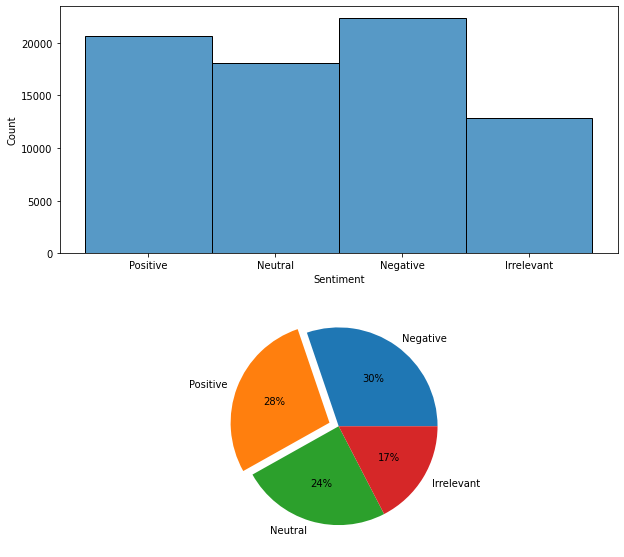

In [74]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
sns.histplot(df['Sentiment'])

ax2 = fig.add_subplot(212)
lable=['Negative','Positive','Neutral','Irrelevant']
data=df['Sentiment'].value_counts()
data
explode = [0, 0.1, 0, 0]
plt.pie(data,labels=lable, explode=explode, autopct='%.0f%%')

In [81]:
tweets = list(df['Tweet_content'])
#tweets

In [82]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [83]:
stops = set(stopwords.words('english'))
punctuations = [',','.',':',';','\'','\"',"/"]
print(stops)

{'other', 'nor', 'by', 'itself', 'doing', 'no', 'under', 'his', 'having', 'shouldn', 'of', 'we', 'them', "mustn't", 'll', "wouldn't", 'hers', 'that', 'on', 'aren', 'a', 'which', 'don', 'him', 'further', 'at', 'just', 'until', 'wouldn', 'few', 'didn', 'and', "she's", 'herself', 'he', 'into', 'will', 'here', 'her', 'who', 'haven', 'hasn', 'hadn', 'what', 'being', 'mightn', 'again', "you'll", 'these', "didn't", 'because', 'between', "aren't", 'or', 'while', "you've", "haven't", 'as', 'myself', 'yourselves', 'themselves', 'very', "hasn't", 'did', 'an', 'now', 'is', 'then', 'had', 'am', "mightn't", 'ours', 'can', 'up', 'couldn', 'most', "you're", 'their', 'in', 'below', 'whom', 'about', 'out', 'both', 'o', 'she', 'your', 'over', 'doesn', 'yours', 'my', 'those', 'down', 'once', 'y', 're', "won't", 'after', 'through', 'its', 'more', 'for', "wasn't", 'than', 'be', "weren't", 'not', 'd', 'any', 'are', 'with', 'against', 'from', 's', 'isn', 'same', 't', 'where', 'during', "don't", 'needn', 'were

In [89]:
cleaned_tweets = []
cloud_str = ""
for tweet in tweets:
    word_tokens = word_tokenize(tweet)
    #print(word_tokens)
    cleaned_tweet = ' '.join(w for w in word_tokens if w not in stops and w not in punctuations)
    cloud_str += cleaned_tweet
    #print(cleaned_tweet)
    #break
    cleaned_tweets.append(cleaned_tweet)

In [91]:
#cloud_str
#cleaned_tweet

In [85]:
from wordcloud import WordCloud

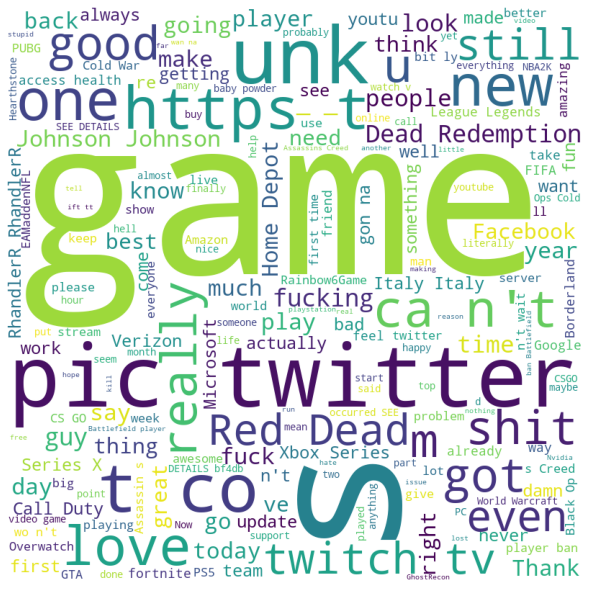

In [92]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(cloud_str)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [93]:
df['Cleaned Tweets'] = cleaned_tweets
df.head(3)

C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Tweet_ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   

                                       Tweet_content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   

                  Cleaned Tweets  
0  im getting borderlands murder  
1        I coming borders I kill  
2    im getting borderlands kill